<a href="https://colab.research.google.com/github/BINSHUMESH/TrafficSignClassification/blob/master/belgium_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
import skimage
def load_data(data_directory):
  directories=[d for d in os.listdir(data_directory)
               if os.path.isdir(os.path.join(data_directory,d))]
  print(directories)
  labels=[]
  images=[]
  for d in directories:
    label_directory=os.path.join(data_directory,d)
    file_names=[os.path.join(label_directory,f)
               for f in os.listdir(label_directory)
               if f.endswith(".ppm")]
    for f in file_names:
      images.append(skimage.data.imread(f))
      labels.append(int(d))
  return images,labels
ROOT_PATH="/content"
train_data_directory=os.path.join(ROOT_PATH,"/content/Testing")
test_data_directory=os.path.join(ROOT_PATH,"/content/Training")
images, labels = load_data(test_data_directory)



['00003', '00050', '00040', '00046', '00011', '00061', '00022', '00058', '00034', '00045', '00015', '00055', '00042', '00009', '00008', '00021', '00057', '00029', '00056', '00032', '00002', '00059', '00033', '00028', '00006', '00060', '00036', '00027', '00000', '00053', '00039', '00052', '00010', '00049', '00012', '00047', '00025', '00037', '00023', '00004', '00048', '00016', '00019', '00054', '00031', '00017', '00001', '00024', '00007', '00013', '00041', '00035', '00020', '00005', '00018', '00014', '00038', '00026', '00043', '00030', '00044', '00051']


In [0]:
import numpy as np
images=np.array(images)
print(images.ndim)
print(images.size)

1
4575


In [0]:
labels=np.array(labels)
print(labels.ndim)
print(len(set(labels)))

1
62


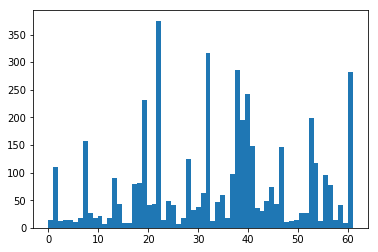

In [0]:
import matplotlib.pyplot as plt
plt.hist(labels,62)
plt.show()


In [0]:
traffic_signs=[300,2250,3650,4000]
def show(images,cmap):
  for i in range(len(traffic_signs)):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]],cmap=cmap)
    plt.subplots_adjust(wspace=0.5)
  plt.show()

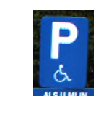

shape: (118, 84, 3), min: 0, max: 255


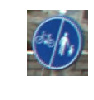

shape: (80, 74, 3), min: 8, max: 255


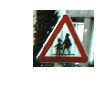

shape: (119, 128, 3), min: 0, max: 255


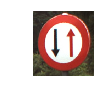

shape: (184, 172, 3), min: 12, max: 255


In [0]:
for i in range(len(traffic_signs)):
  plt.subplot(1,4,i+1)
  plt.axis('off')
  plt.imshow(images[traffic_signs[i]])
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape,
                                               images[traffic_signs[i]].min(),
                                               images[traffic_signs[i]].max()))  

In [0]:
from skimage import transform
images28=[transform.resize(image,(28,28)) for image in images]
images28=np.array(images28)

In [0]:
from skimage.color import rgb2gray
images28=rgb2gray(images28)

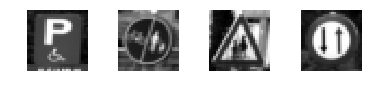

In [0]:
show(images28,"gray")

In [0]:
x=tf.placeholder(dtype=tf.float32, shape=[None,28,28])
y=tf.placeholder(dtype=tf.int32, shape=[None])
images_flatten=tf.contrib.layers.flatten(x)
logits=tf.contrib.layers.fully_connected(images_flatten,62,tf.nn.relu)
loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))
train_op=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred=tf.argmax(logits,1)
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [0]:
print("images_flat: ", images_flatten)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [0]:
tf.set_random_seed(1234)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(201):
  print('EPOCH',i)
  _, accuracy_val=sess.run([train_op,accuracy],feed_dict={x: images28,y: labels})
  if i % 10 == 0:
            print("Loss: ", loss)
print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 1
EPOCH 2
EPOCH 3
EPOCH 4
EPOCH 5
EPOCH 6
EPOCH 7
EPOCH 8
EPOCH 9
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 11
EPOCH 12
EPOCH 13
EPOCH 14
EPOCH 15
EPOCH 16
EPOCH 17
EPOCH 18
EPOCH 19
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 21
EPOCH 22
EPOCH 23
EPOCH 24
EPOCH 25
EPOCH 26
EPOCH 27
EPOCH 28
EPOCH 29
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 31
EPOCH 32
EPOCH 33
EPOCH 34
EPOCH 35
EPOCH 36
EPOCH 37
EPOCH 38
EPOCH 39
EPOCH 40
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 41
EPOCH 42
EPOCH 43
EPOCH 44
EPOCH 45
EPOCH 46
EPOCH 47
EPOCH 48
EPOCH 49
EPOCH 50
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 51
EPOCH 52
EPOCH 53
EPOCH 54
EPOCH 55
EPOCH 56
EPOCH 57
EPOCH 58
EPOCH 59
EPOCH 60
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
EPOCH 61
EPOCH 62
EPOCH 63
EPOCH 64
EPOCH 65
EPOCH 66
EPOCH 67
EPOCH 68
EPOCH 69
EPOCH 70
Loss:  Tensor(

In [0]:
import matplotlib.pyplot as plt
import random

sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

print(sample_labels)
print(predicted)


[35, 38, 45, 41, 25, 10, 41, 13, 20, 8]
[28 38 45 41 32 40 41 13 32 61]


In [0]:
from skimage import transform
test_images, test_labels = load_data(test_data_directory)
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))

['00003', '00050', '00040', '00046', '00011', '00061', '00022', '00058', '00034', '00045', '00015', '00055', '00042', '00009', '00008', '00021', '00057', '00029', '00056', '00032', '00002', '00059', '00033', '00028', '00006', '00060', '00036', '00027', '00000', '00053', '00039', '00052', '00010', '00049', '00012', '00047', '00025', '00037', '00023', '00004', '00048', '00016', '00019', '00054', '00031', '00017', '00001', '00024', '00007', '00013', '00041', '00035', '00020', '00005', '00018', '00014', '00038', '00026', '00043', '00030', '00044', '00051']
Accuracy: 0.715
